In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch

In [70]:
from turtle import color


def get_val_results(path):
    results = []
    with open(path) as text:
        for line in text:
            if 'val_acc1' in line:
                i = line.index(':', -25)
                results.append(float(line[i+2:-2]))
    return results

def simple_vis(mean_list, std_list, name_list, title='Validation Accuracy Comparison'):
    plt.style.use('seaborn-darkgrid')
    dpi = 150
    linewidth=1.5
    legend_loc = 'lower right'
    fig, ax = plt.subplots(1,1,sharex=True, sharey=True, 
                            figsize=(500/dpi, 800/dpi), dpi=dpi)
    palette = plt.get_cmap('Set1')
    for i in range(len(mean_list)):
        ax.errorbar(x=[0,1,2,3,4], y=mean_list[i], yerr=std_list[i], label=name_list[i], color=palette(i))
    ax.legend(loc=legend_loc)
    ax.set_title(title)
    plt.show()

def get_mean_std(*args):
    merge=[]
    for acc in args:
        merge=np.concatenate((merge, acc))
    merge=merge.reshape(-1,5)
    return np.mean(merge,0), np.std(merge,0)

In [33]:
resnet50_10 = get_val_results('1/resnet50_10.txt')
resnet50_56 = get_val_results('1/resnet50_56.txt')
resnet50_1234 = get_val_results('1/resnet50_1234.txt')

In [45]:
resnet50_mean, resnet50_std = get_mean_std(resnet50_10, resnet50_56, resnet50_1234)

<ErrorbarContainer object of 3 artists>

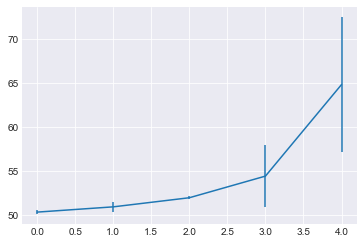

In [54]:
plt.errorbar(x=[0,1,2,3,4], y=resnet50_mean, yerr=resnet50_std)

In [63]:
for i in mean_list:
    print(i)

[50.32749811808268 50.92416508992513 51.95916620890299 54.41583251953125
 64.81166458129883]


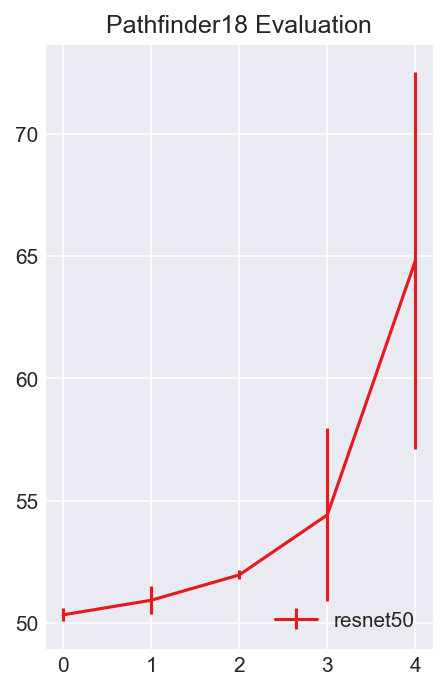

In [71]:
mean_list = np.array([resnet50_mean], dtype=object)
std_list = np.array([resnet50_std], dtype=object)
name_list = np.array(['resnet50'])
simple_vis(mean_list, std_list, name_list, 'Pathfinder18 Evaluation')